<a href="https://colab.research.google.com/github/rodrigosanches21/credit_card_clustering/blob/main/Credit_Card_Clustering/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports e Análise Preliminar

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit_card_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
print(f'O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataset tem 8950 linhas e 18 colunas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
#dropando variável 'CUST_ID', que não traz informação para modelagem
df_v1 = df.drop('CUST_ID', axis=1)

In [7]:
df_v1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# dropando a linha com valor nulo de 'CREDIT LIMIT'
df_v1.dropna(axis=0, subset=['CREDIT_LIMIT'], inplace=True)

In [9]:
df_v1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

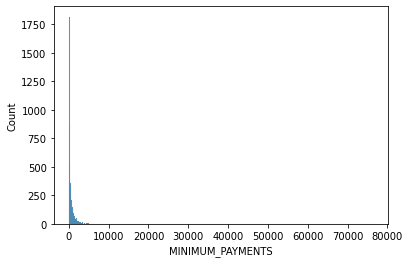

In [10]:
sns.histplot(data=df_v1, x='MINIMUM_PAYMENTS')

In [11]:
# Preenchendo valores nulos da coluna 'MINIMUM_PAYMENTS'com a sua mediana
mediana_minimum_payments = df_v1['MINIMUM_PAYMENTS'].median()
df_v1['MINIMUM_PAYMENTS'].fillna(mediana_minimum_payments, inplace=True)


In [12]:
df_v1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#Definindo nº de Clusters com KMeans

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_v1_padronizado = scaler.fit_transform(df_v1)
df_v1_padronizado = pd.DataFrame(df_v1_padronizado, columns=df_v1.columns)
df_v1_padronizado.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-0.302427,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,0.097453,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-0.093330,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,-0.228291,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-0.257295,-0.525588,0.360541


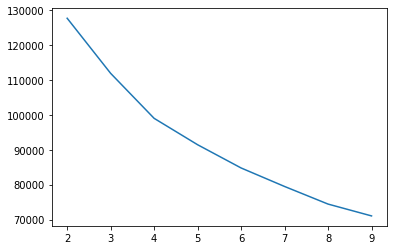

In [16]:
#Método do Cotovelo

from sklearn.cluster import KMeans

inertias=[]

for cluster in np.arange(2,10):
  
  kmeans = KMeans(cluster)
  kmeans.fit_predict(df_v1_padronizado)
  inertias.append(kmeans.inertia_)

plt.plot(np.arange(2,10), inertias)

In [17]:
#Silhouette Score, Davies Bouldin e Calinski Harabasz

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

silhouette_scores={}
davies_bouldin_scores={}
calinski_harabasz_scores={}

for cluster in np.arange(2,11):
  
  kmeans = KMeans(cluster)
  labels_kmeans = kmeans.fit_predict(df_v1_padronizado)
  silhouette_scores[cluster] = silhouette_score(df_v1_padronizado, labels_kmeans)
  davies_bouldin_scores[cluster] = davies_bouldin_score(df_v1_padronizado, labels_kmeans)
  calinski_harabasz_scores[cluster] = calinski_harabasz_score(df_v1_padronizado, labels_kmeans)

In [18]:
silhouette_scores

{2: 0.2100617034826442,
 3: 0.25071572221706523,
 4: 0.19766936752275144,
 5: 0.19272103277343347,
 6: 0.20295835410139376,
 7: 0.21470123375872135,
 8: 0.2129275075849334,
 9: 0.22613045032736348,
 10: 0.2219092458215281}

In [19]:
davies_bouldin_scores

{2: 1.9120849242698026,
 3: 1.5968887491492367,
 4: 1.5749777788641188,
 5: 1.5416304754333203,
 6: 1.5064765663495263,
 7: 1.3931092906460723,
 8: 1.3659619442630646,
 9: 1.293183374426692,
 10: 1.3445361776682196}

In [20]:
calinski_harabasz_scores

{2: 1705.7821385773575,
 3: 1604.8501315211954,
 4: 1597.7509974615223,
 5: 1481.9429061632814,
 6: 1419.4332857325724,
 7: 1361.4191639789337,
 8: 1311.627861800116,
 9: 1317.3847611978704,
 10: 1280.972445552246}

Pelo método do Cotovelo, o número ideal de cluster é 4, enquanto que pelo Silhouette_Score são 3. Já pelo Davies_Bouldin são 9 e pelo Calinski_Harabasz são 2. Seguiremos então a quantidade de clusters do Silhouette_Score por ser o método mais utilizado e porque o seu resultado deu próximo ao método do Cotovelo e ao Calinski_Harabasz.

In [21]:
kmeans = KMeans(n_clusters=3)
df_v2 = df_v1.copy()
df_v2['LABELS'] = kmeans.fit_predict(df_v1_padronizado)
df_v2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,LABELS
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [22]:
#calculando a quantidade de clientes por cluster e resumindo os clusters pelo valor médio de cada variável
qtd_instancias_por_cluster = df_v2['LABELS'].value_counts().to_frame().rename({'LABELS': 'QTD_INSTANCIAS'}, axis=1)
qtd_instancias_por_cluster

df_vfinal = df_v2.groupby(by='LABELS').mean()
qtd_instancias_por_cluster.join(df_vfinal).T.sort_index(axis=1)

,0,1,2
QTD_INSTANCIAS,1254.000000,6103.000000,1592.000000
BALANCE,2196.556404,800.168174,3997.564832
BALANCE_FREQUENCY,0.981468,0.834681,0.958912
PURCHASES,4230.325255,501.351817,385.744504
ONEOFF_PURCHASES,2696.916116,249.616307,249.355113
INSTALLMENTS_PURCHASES,1533.887608,252.057149,136.467073
CASH_ADVANCE,454.876851,332.425040,3870.291467
PURCHASES_FREQUENCY,0.948185,0.463372,0.233450
ONEOFF_PURCHASES_FREQUENCY,0.669055,0.130417,0.111221
PURCHASES_INSTALLMENTS_FREQUENCY,0.738752,0.344766,0.145233


#Conclusão

Analisando o valor médio das variáveis para os três cluster, chega-se às seguintes conclusões:

**- Cluster 0: abrange os clientes que mais utilizam o cartão para fazer compras**

**- Cluster 1: abrange a maioria dos clientes que, por sua vez, utilizam pouco o cartão, tanto para fazer compras, quanto para a modalide cash advance**

**- Cluster 2: abrange os clientes que mais utilizam o cartão na modalide cash advance**
